In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Dense, Flatten, BatchNormalization
from mlxtend.data import loadlocal_mnist
import cv2
import os
from mlxtend.data import loadlocal_mnist
from matplotlib import pyplot as plt
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
import random
import timeit
import h5py
# %matplotlib widgetsnbextension

Using TensorFlow backend.


In [2]:
tf.version

<module 'tensorflow._api.v2.version' from '/home/nandi/.local/lib/python3.8/site-packages/tensorflow/_api/v2/version/__init__.py'>

In [3]:
hf2 = h5py.File('data_new.h5', 'r')
x = hf2.get('train_img')
y = hf2.get("train_labels")
print(x.shape,y.shape)

(155186, 28, 28, 1) (155186,)


In [4]:
hf2 = h5py.File('data_new_val.h5', 'r')
x_val = hf2.get('train_img')
y_val = hf2.get("train_labels")
print(x_val.shape, y_val.shape)

(10000, 28, 28, 1) (10000,)


In [9]:
classes = 11

In [18]:
X, Y = loadlocal_mnist(images_path='svhn-data/train-images-idx3-ubyte', labels_path='svhn-data/train-labels-idx1-ubyte')

In [5]:
X_test, Y_test = loadlocal_mnist(images_path='svhn-data/t10k-images-idx3-ubyte', labels_path='svhn-data/t10k-labels-idx1-ubyte')

In [20]:
np.unique(y)

NameError: name 'y' is not defined

In [20]:
# x = X.reshape((60000,28,28,1))
x_test = X_test.reshape((X_test.shape[0],28,28,1))

In [26]:
imgs = shuffle(imgs)

In [14]:
display(x[1200])
y[1200]

4

In [27]:
x = np.append(x,imgs,axis=0)

In [28]:
y = np.append(Y,y_imgs)

In [12]:
def display(img):
    cv2.imshow("img",img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [33]:
x,y = shuffle(x,y)

In [27]:
x = x / 255.0

In [6]:
Y_test.shape

(10000,)

In [50]:
x_val = x[0:10000]
y_val = y[0:10000]
x = x[10000:]
y = y[10000:]

In [60]:
ind = 5960
display(np.reshape(x[ind],(28,28)))
y[ind]

In [61]:
Y_test = Y_test.reshape((Y_test.shape[0],1))

In [6]:
x = np.array(x)
y = np.array(y)
y_val = np.array(y_val)
x_val = np.array(x_val)

In [12]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), strides=1, activation='relu', input_shape = (28, 28, 1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.6))
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), strides=1, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), strides=1, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.7))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.8))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(11, activation='softmax'))

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(x,y, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
4850/4850 [==============================] - 100s 21ms/step - loss: 0.2790 - accuracy: 0.9169 - val_loss: 0.1210 - val_accuracy: 0.9663
Epoch 2/5
4850/4850 [==============================] - 101s 21ms/step - loss: 0.1986 - accuracy: 0.9429 - val_loss: 0.0820 - val_accuracy: 0.9775
Epoch 3/5
4850/4850 [==============================] - 100s 21ms/step - loss: 0.1648 - accuracy: 0.9522 - val_loss: 0.0757 - val_accuracy: 0.9803
Epoch 4/5
4850/4850 [==============================] - 101s 21ms/step - loss: 0.1420 - accuracy: 0.9592 - val_loss: 0.0636 - val_accuracy: 0.9834
Epoch 5/5
4850/4850 [==============================] - 100s 21ms/step - loss: 0.1279 - accuracy: 0.9624 - val_loss: 0.0564 - val_accuracy: 0.9843


In [22]:
history2 = model.fit(x,y, epochs=3, validation_data=(x_val, y_val))

Epoch 1/3
4850/4850 [==============================] - 101s 21ms/step - loss: 0.1198 - accuracy: 0.9652 - val_loss: 0.0546 - val_accuracy: 0.9866
Epoch 2/3
4850/4850 [==============================] - 102s 21ms/step - loss: 0.1130 - accuracy: 0.9677 - val_loss: 0.0477 - val_accuracy: 0.9869
Epoch 3/3
4850/4850 [==============================] - 102s 21ms/step - loss: 0.1076 - accuracy: 0.9683 - val_loss: 0.0471 - val_accuracy: 0.9874


In [24]:
hist = history
history += history2

TypeError: unsupported operand type(s) for +=: 'History' and 'History'

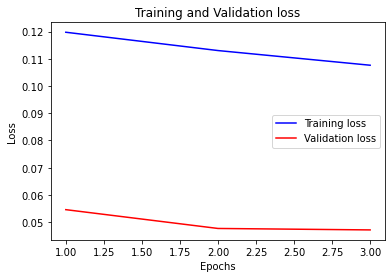

In [37]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs,val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

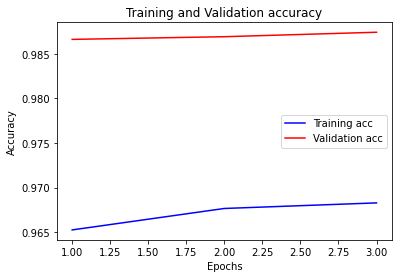

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [35]:
test = model.evaluate(x_test, Y_test)
print("Loss:", test[0])
print("Accuracy:", test[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.0300 - accuracy: 0.9923
Loss: 0.03002990037202835
Accuracy: 0.9922999739646912


In [36]:
history2.history

{'loss': [0.11976417154073715, 0.11303946375846863, 0.10764536261558533],
 'accuracy': [0.965248167514801, 0.9676517248153687, 0.9682767987251282],
 'val_loss': [0.054586779326200485, 0.0476791150867939, 0.047144435346126556],
 'val_accuracy': [0.9865999817848206, 0.9868999719619751, 0.9873999953269958]}

In [33]:
hist.history

{'loss': None, 'accuracy': None, 'val_loss': None, 'val_accuracy': None}

In [ ]:
history.history['loss'].append(history2.history['loss'])
history.history['accuracy'].append(history2.history['accuracy'])
history.history['val_loss'].append(history2.history['val_loss'])
history.history['val_accuracy'].append(history2.history['val_accuracy'])

In [38]:
# plt.plot(history.history[''])
# plt.show()
# model = keras.models.load_model('multi_digits_model_0_10_drop_aug.h5')
keras.models.save_model(model,'multi_digits_model_0_10_drop_aug_try2.h5')

In [24]:
x_val.shape

(10000, 28, 28, 1)

In [105]:
x_test = np.append(x_test,imgs[0:100], axis=0)
Y_test = np.append(Y_test,y_imgs[0:100])

In [157]:
p = 100
print(model.predict(x_test[p].reshape(1,28,28,1)).argmax())
print(Y_test[p])

6
[6]


In [112]:
Y_test[0]

array([7], dtype=uint8)

In [99]:
x_test[0].shape

(28, 28, 1)

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_3 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
dropout_2 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_4 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 64)       

In [114]:
model.save('multi_digits_model_0_9.h5')

In [200]:
img = cv2.imread("svhn-data/images/img6.jpg",0)

In [170]:
img = cv2.resize(img,(28,28))
display(img)

In [171]:
img = img.reshape((1,28,28,1))

In [172]:
model.predict(img).argmax()

8

In [71]:
display(img[0])

In [372]:
h, w = img.shape
u = 0
for i in range(0,h-28+1):
    for j in range(0, w-28+1):
        m = img[i:i+28, j:j+28]
        m = m.reshape((1,28,28,1))
        u += 1
#         if u %100 == 0:
#             display(m[0])
        print(model.predict(m).argmax(), end=" ")

3 

In [195]:
l = img[0:28,0:28]

In [198]:
img.shape

(63, 72)

In [204]:
import os
l = os.system('ls')

In [341]:
import cv2
import os
import glob
img_dir = "/home/nandi/alpha/files/3_6/IVP/mini-project/ipynb/svhn-data/train_answer" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
data = []
for f1 in files:
    img = cv2.imread(f1,0)
    img = cv2.resize(img,(28,28))
    img[img < 150] = 0
    img[img > 150] = 255
    data.append(255 - img)

In [342]:
data = np.array(data)

In [343]:
data = data.reshape((6,28,28,1))
yy = np.array([3,5,5,4,5,3])
# yy = yy.reshape((6,1))

In [338]:
Y.shape

(60000,)

In [344]:
data = np.append(x,data,axis=0)
y = np.append(Y,yy,axis=0)

In [354]:
import timeit

In [371]:
tic = timeit.default_timer()
a = model.predict(data[58200:60006])
toc = timeit.default_timer()
print(toc-tic)

1.0427113469995675


In [84]:
os.getpid()

49915

In [345]:
display(data[60004])

In [352]:
y[60003:60006]

array([4, 5, 3])

In [4]:
f = os.listdir("out")
imgs = []
y_imgs = []
for i in f:
    path = "out/"+i
    img = cv2.imread(path,0)
    imgs.append(img)
    y_imgs.append(10)
len(imgs)
imgs = np.array(imgs)
y_imgs = np.array(y_imgs)
imgs = np.reshape(imgs,(31,28,28,1))

In [23]:
def augumentation(X_, y_):
    
    for k in range(20000):
        print("Image:",k)
#         print("Shape:",X_[k].shape,k)
        data = img_to_array(X_[k])
        # expand dimension to one sample
#         print(data.shape)
        samples = expand_dims(data, 0)
        # create image data augmentation generator
#         datagen = ImageDataGenerator(height_shift_range=[-2,2])
        datagen = ImageDataGenerator(
            rotation_range=20,
            zoom_range=0.15,
            width_shift_range=2,
            height_shift_range=2,
            shear_range=0.15,
            horizontal_flip=False,
            fill_mode="nearest")
#         datagen = ImageDataGenerator(height_shift_range=0.5)
        # prepare iterator
        it = datagen.flow(samples, batch_size=1)
        # generate samples and plot
        for i in range(5):
            # define subplot
#             pyplot.subplot(330 + 1 + i)
            # generate batch of images
            batch = it.next()
            # convert to unsigned integers for viewing
            image = batch[0].astype('uint8')
#             print(image.shape)
            # plot raw pixel data
            image = np.expand_dims(image,0)
            X_ = np.append(X_,image,axis=0)
            y_ = np.append(y_, np.expand_dims(y_[k],0),axis=0)
#             print(y_.shape)
#             print("X_ shape:",X_.shape)
            
#             pyplot.imshow(image[0,:,:,0])
    # show the figure
    plt.show()
    print(X_.shape,y_.shape)
    return X_,y_
x, Y = augumentation(x, Y)

Image: 0
Image: 1
Image: 2
Image: 3
Image: 4
Image: 5
Image: 6
Image: 7
Image: 8
Image: 9
Image: 10
Image: 11
Image: 12
Image: 13
Image: 14
Image: 15
Image: 16
Image: 17
Image: 18
Image: 19
Image: 20
Image: 21
Image: 22
Image: 23
Image: 24
Image: 25
Image: 26
Image: 27
Image: 28
Image: 29
Image: 30
Image: 31
Image: 32
Image: 33
Image: 34
Image: 35
Image: 36
Image: 37
Image: 38
Image: 39
Image: 40
Image: 41
Image: 42
Image: 43
Image: 44
Image: 45
Image: 46
Image: 47
Image: 48
Image: 49
Image: 50
Image: 51
Image: 52
Image: 53
Image: 54
Image: 55
Image: 56
Image: 57
Image: 58
Image: 59
Image: 60
Image: 61
Image: 62
Image: 63
Image: 64
Image: 65
Image: 66
Image: 67
Image: 68
Image: 69
Image: 70
Image: 71
Image: 72
Image: 73
Image: 74
Image: 75
Image: 76
Image: 77
Image: 78
Image: 79
Image: 80
Image: 81
Image: 82
Image: 83
Image: 84
Image: 85
Image: 86
Image: 87
Image: 88
Image: 89
Image: 90
Image: 91
Image: 92
Image: 93
Image: 94
Image: 95
Image: 96
Image: 97
Image: 98
Image: 99
Image: 100

Image: 759
Image: 760
Image: 761
Image: 762
Image: 763
Image: 764
Image: 765
Image: 766
Image: 767
Image: 768
Image: 769
Image: 770
Image: 771
Image: 772
Image: 773
Image: 774
Image: 775
Image: 776
Image: 777
Image: 778
Image: 779
Image: 780
Image: 781
Image: 782
Image: 783
Image: 784
Image: 785
Image: 786
Image: 787
Image: 788
Image: 789
Image: 790
Image: 791
Image: 792
Image: 793
Image: 794
Image: 795
Image: 796
Image: 797
Image: 798
Image: 799
Image: 800
Image: 801
Image: 802
Image: 803
Image: 804
Image: 805
Image: 806
Image: 807
Image: 808
Image: 809
Image: 810
Image: 811
Image: 812
Image: 813
Image: 814
Image: 815
Image: 816
Image: 817
Image: 818
Image: 819
Image: 820
Image: 821
Image: 822
Image: 823
Image: 824
Image: 825
Image: 826
Image: 827
Image: 828
Image: 829
Image: 830
Image: 831
Image: 832
Image: 833
Image: 834
Image: 835
Image: 836
Image: 837
Image: 838
Image: 839
Image: 840
Image: 841
Image: 842
Image: 843
Image: 844
Image: 845
Image: 846
Image: 847
Image: 848
Image: 849

Image: 1463
Image: 1464
Image: 1465
Image: 1466
Image: 1467
Image: 1468
Image: 1469
Image: 1470
Image: 1471
Image: 1472
Image: 1473
Image: 1474
Image: 1475
Image: 1476
Image: 1477
Image: 1478
Image: 1479
Image: 1480
Image: 1481
Image: 1482
Image: 1483
Image: 1484
Image: 1485
Image: 1486
Image: 1487
Image: 1488
Image: 1489
Image: 1490
Image: 1491
Image: 1492
Image: 1493
Image: 1494
Image: 1495
Image: 1496
Image: 1497
Image: 1498
Image: 1499
Image: 1500
Image: 1501
Image: 1502
Image: 1503
Image: 1504
Image: 1505
Image: 1506
Image: 1507
Image: 1508
Image: 1509
Image: 1510
Image: 1511
Image: 1512
Image: 1513
Image: 1514
Image: 1515
Image: 1516
Image: 1517
Image: 1518
Image: 1519
Image: 1520
Image: 1521
Image: 1522
Image: 1523
Image: 1524
Image: 1525
Image: 1526
Image: 1527
Image: 1528
Image: 1529
Image: 1530
Image: 1531
Image: 1532
Image: 1533
Image: 1534
Image: 1535
Image: 1536
Image: 1537
Image: 1538
Image: 1539
Image: 1540
Image: 1541
Image: 1542
Image: 1543
Image: 1544
Image: 1545
Imag

Image: 2148
Image: 2149
Image: 2150
Image: 2151
Image: 2152
Image: 2153
Image: 2154
Image: 2155
Image: 2156
Image: 2157
Image: 2158
Image: 2159
Image: 2160
Image: 2161
Image: 2162
Image: 2163
Image: 2164
Image: 2165
Image: 2166
Image: 2167
Image: 2168
Image: 2169
Image: 2170
Image: 2171
Image: 2172
Image: 2173
Image: 2174
Image: 2175
Image: 2176
Image: 2177
Image: 2178
Image: 2179
Image: 2180
Image: 2181
Image: 2182
Image: 2183
Image: 2184
Image: 2185
Image: 2186
Image: 2187
Image: 2188
Image: 2189
Image: 2190
Image: 2191
Image: 2192
Image: 2193
Image: 2194
Image: 2195
Image: 2196
Image: 2197
Image: 2198
Image: 2199
Image: 2200
Image: 2201
Image: 2202
Image: 2203
Image: 2204
Image: 2205
Image: 2206
Image: 2207
Image: 2208
Image: 2209
Image: 2210
Image: 2211
Image: 2212
Image: 2213
Image: 2214
Image: 2215
Image: 2216
Image: 2217
Image: 2218
Image: 2219
Image: 2220
Image: 2221
Image: 2222
Image: 2223
Image: 2224
Image: 2225
Image: 2226
Image: 2227
Image: 2228
Image: 2229
Image: 2230
Imag

Image: 2831
Image: 2832
Image: 2833
Image: 2834
Image: 2835
Image: 2836
Image: 2837
Image: 2838
Image: 2839
Image: 2840
Image: 2841
Image: 2842
Image: 2843
Image: 2844
Image: 2845
Image: 2846
Image: 2847
Image: 2848
Image: 2849
Image: 2850
Image: 2851
Image: 2852
Image: 2853
Image: 2854
Image: 2855
Image: 2856
Image: 2857
Image: 2858
Image: 2859
Image: 2860
Image: 2861
Image: 2862
Image: 2863
Image: 2864
Image: 2865
Image: 2866
Image: 2867
Image: 2868
Image: 2869
Image: 2870
Image: 2871
Image: 2872
Image: 2873
Image: 2874
Image: 2875
Image: 2876
Image: 2877
Image: 2878
Image: 2879
Image: 2880
Image: 2881
Image: 2882
Image: 2883
Image: 2884
Image: 2885
Image: 2886
Image: 2887
Image: 2888
Image: 2889
Image: 2890
Image: 2891
Image: 2892
Image: 2893
Image: 2894
Image: 2895
Image: 2896
Image: 2897
Image: 2898
Image: 2899
Image: 2900
Image: 2901
Image: 2902
Image: 2903
Image: 2904
Image: 2905
Image: 2906
Image: 2907
Image: 2908
Image: 2909
Image: 2910
Image: 2911
Image: 2912
Image: 2913
Imag

Image: 3516
Image: 3517
Image: 3518
Image: 3519
Image: 3520
Image: 3521
Image: 3522
Image: 3523
Image: 3524
Image: 3525
Image: 3526
Image: 3527
Image: 3528
Image: 3529
Image: 3530
Image: 3531
Image: 3532
Image: 3533
Image: 3534
Image: 3535
Image: 3536
Image: 3537
Image: 3538
Image: 3539
Image: 3540
Image: 3541
Image: 3542
Image: 3543
Image: 3544
Image: 3545
Image: 3546
Image: 3547
Image: 3548
Image: 3549
Image: 3550
Image: 3551
Image: 3552
Image: 3553
Image: 3554
Image: 3555
Image: 3556
Image: 3557
Image: 3558
Image: 3559
Image: 3560
Image: 3561
Image: 3562
Image: 3563
Image: 3564
Image: 3565
Image: 3566
Image: 3567
Image: 3568
Image: 3569
Image: 3570
Image: 3571
Image: 3572
Image: 3573
Image: 3574
Image: 3575
Image: 3576
Image: 3577
Image: 3578
Image: 3579
Image: 3580
Image: 3581
Image: 3582
Image: 3583
Image: 3584
Image: 3585
Image: 3586
Image: 3587
Image: 3588
Image: 3589
Image: 3590
Image: 3591
Image: 3592
Image: 3593
Image: 3594
Image: 3595
Image: 3596
Image: 3597
Image: 3598
Imag

Image: 4201
Image: 4202
Image: 4203
Image: 4204
Image: 4205
Image: 4206
Image: 4207
Image: 4208
Image: 4209
Image: 4210
Image: 4211
Image: 4212
Image: 4213
Image: 4214
Image: 4215
Image: 4216
Image: 4217
Image: 4218
Image: 4219
Image: 4220
Image: 4221
Image: 4222
Image: 4223
Image: 4224
Image: 4225
Image: 4226
Image: 4227
Image: 4228
Image: 4229
Image: 4230
Image: 4231
Image: 4232
Image: 4233
Image: 4234
Image: 4235
Image: 4236
Image: 4237
Image: 4238
Image: 4239
Image: 4240
Image: 4241
Image: 4242
Image: 4243
Image: 4244
Image: 4245
Image: 4246
Image: 4247
Image: 4248
Image: 4249
Image: 4250
Image: 4251
Image: 4252
Image: 4253
Image: 4254
Image: 4255
Image: 4256
Image: 4257
Image: 4258
Image: 4259
Image: 4260
Image: 4261
Image: 4262
Image: 4263
Image: 4264
Image: 4265
Image: 4266
Image: 4267
Image: 4268
Image: 4269
Image: 4270
Image: 4271
Image: 4272
Image: 4273
Image: 4274
Image: 4275
Image: 4276
Image: 4277
Image: 4278
Image: 4279
Image: 4280
Image: 4281
Image: 4282
Image: 4283
Imag

Image: 4884
Image: 4885
Image: 4886
Image: 4887
Image: 4888
Image: 4889
Image: 4890
Image: 4891
Image: 4892
Image: 4893
Image: 4894
Image: 4895
Image: 4896
Image: 4897
Image: 4898
Image: 4899
Image: 4900
Image: 4901
Image: 4902
Image: 4903
Image: 4904
Image: 4905
Image: 4906
Image: 4907
Image: 4908
Image: 4909
Image: 4910
Image: 4911
Image: 4912
Image: 4913
Image: 4914
Image: 4915
Image: 4916
Image: 4917
Image: 4918
Image: 4919
Image: 4920
Image: 4921
Image: 4922
Image: 4923
Image: 4924
Image: 4925
Image: 4926
Image: 4927
Image: 4928
Image: 4929
Image: 4930
Image: 4931
Image: 4932
Image: 4933
Image: 4934
Image: 4935
Image: 4936
Image: 4937
Image: 4938
Image: 4939
Image: 4940
Image: 4941
Image: 4942
Image: 4943
Image: 4944
Image: 4945
Image: 4946
Image: 4947
Image: 4948
Image: 4949
Image: 4950
Image: 4951
Image: 4952
Image: 4953
Image: 4954
Image: 4955
Image: 4956
Image: 4957
Image: 4958
Image: 4959
Image: 4960
Image: 4961
Image: 4962
Image: 4963
Image: 4964
Image: 4965
Image: 4966
Imag

Image: 5569
Image: 5570
Image: 5571
Image: 5572
Image: 5573
Image: 5574
Image: 5575
Image: 5576
Image: 5577
Image: 5578
Image: 5579
Image: 5580
Image: 5581
Image: 5582
Image: 5583
Image: 5584
Image: 5585
Image: 5586
Image: 5587
Image: 5588
Image: 5589
Image: 5590
Image: 5591
Image: 5592
Image: 5593
Image: 5594
Image: 5595
Image: 5596
Image: 5597
Image: 5598
Image: 5599
Image: 5600
Image: 5601
Image: 5602
Image: 5603
Image: 5604
Image: 5605
Image: 5606
Image: 5607
Image: 5608
Image: 5609
Image: 5610
Image: 5611
Image: 5612
Image: 5613
Image: 5614
Image: 5615
Image: 5616
Image: 5617
Image: 5618
Image: 5619
Image: 5620
Image: 5621
Image: 5622
Image: 5623
Image: 5624
Image: 5625
Image: 5626
Image: 5627
Image: 5628
Image: 5629
Image: 5630
Image: 5631
Image: 5632
Image: 5633
Image: 5634
Image: 5635
Image: 5636
Image: 5637
Image: 5638
Image: 5639
Image: 5640
Image: 5641
Image: 5642
Image: 5643
Image: 5644
Image: 5645
Image: 5646
Image: 5647
Image: 5648
Image: 5649
Image: 5650
Image: 5651
Imag

Image: 6254
Image: 6255
Image: 6256
Image: 6257
Image: 6258
Image: 6259
Image: 6260
Image: 6261
Image: 6262
Image: 6263
Image: 6264
Image: 6265
Image: 6266
Image: 6267
Image: 6268
Image: 6269
Image: 6270
Image: 6271
Image: 6272
Image: 6273
Image: 6274
Image: 6275
Image: 6276
Image: 6277
Image: 6278
Image: 6279
Image: 6280
Image: 6281
Image: 6282
Image: 6283
Image: 6284
Image: 6285
Image: 6286
Image: 6287
Image: 6288
Image: 6289
Image: 6290
Image: 6291
Image: 6292
Image: 6293
Image: 6294
Image: 6295
Image: 6296
Image: 6297
Image: 6298
Image: 6299
Image: 6300
Image: 6301
Image: 6302
Image: 6303
Image: 6304
Image: 6305
Image: 6306
Image: 6307
Image: 6308
Image: 6309
Image: 6310
Image: 6311
Image: 6312
Image: 6313
Image: 6314
Image: 6315
Image: 6316
Image: 6317
Image: 6318
Image: 6319
Image: 6320
Image: 6321
Image: 6322
Image: 6323
Image: 6324
Image: 6325
Image: 6326
Image: 6327
Image: 6328
Image: 6329
Image: 6330
Image: 6331
Image: 6332
Image: 6333
Image: 6334
Image: 6335
Image: 6336
Imag

Image: 6938
Image: 6939
Image: 6940
Image: 6941
Image: 6942
Image: 6943
Image: 6944
Image: 6945
Image: 6946
Image: 6947
Image: 6948
Image: 6949
Image: 6950
Image: 6951
Image: 6952
Image: 6953
Image: 6954
Image: 6955
Image: 6956
Image: 6957
Image: 6958
Image: 6959
Image: 6960
Image: 6961
Image: 6962
Image: 6963
Image: 6964
Image: 6965
Image: 6966
Image: 6967
Image: 6968
Image: 6969
Image: 6970
Image: 6971
Image: 6972
Image: 6973
Image: 6974
Image: 6975
Image: 6976
Image: 6977
Image: 6978
Image: 6979
Image: 6980
Image: 6981
Image: 6982
Image: 6983
Image: 6984
Image: 6985
Image: 6986
Image: 6987
Image: 6988
Image: 6989
Image: 6990
Image: 6991
Image: 6992
Image: 6993
Image: 6994
Image: 6995
Image: 6996
Image: 6997
Image: 6998
Image: 6999
Image: 7000
Image: 7001
Image: 7002
Image: 7003
Image: 7004
Image: 7005
Image: 7006
Image: 7007
Image: 7008
Image: 7009
Image: 7010
Image: 7011
Image: 7012
Image: 7013
Image: 7014
Image: 7015
Image: 7016
Image: 7017
Image: 7018
Image: 7019
Image: 7020
Imag

Image: 7622
Image: 7623
Image: 7624
Image: 7625
Image: 7626
Image: 7627
Image: 7628
Image: 7629
Image: 7630
Image: 7631
Image: 7632
Image: 7633
Image: 7634
Image: 7635
Image: 7636
Image: 7637
Image: 7638
Image: 7639
Image: 7640
Image: 7641
Image: 7642
Image: 7643
Image: 7644
Image: 7645
Image: 7646
Image: 7647
Image: 7648
Image: 7649
Image: 7650
Image: 7651
Image: 7652
Image: 7653
Image: 7654
Image: 7655
Image: 7656
Image: 7657
Image: 7658
Image: 7659
Image: 7660
Image: 7661
Image: 7662
Image: 7663
Image: 7664
Image: 7665
Image: 7666
Image: 7667
Image: 7668
Image: 7669
Image: 7670
Image: 7671
Image: 7672
Image: 7673
Image: 7674
Image: 7675
Image: 7676
Image: 7677
Image: 7678
Image: 7679
Image: 7680
Image: 7681
Image: 7682
Image: 7683
Image: 7684
Image: 7685
Image: 7686
Image: 7687
Image: 7688
Image: 7689
Image: 7690
Image: 7691
Image: 7692
Image: 7693
Image: 7694
Image: 7695
Image: 7696
Image: 7697
Image: 7698
Image: 7699
Image: 7700
Image: 7701
Image: 7702
Image: 7703
Image: 7704
Imag

Image: 8306
Image: 8307
Image: 8308
Image: 8309
Image: 8310
Image: 8311
Image: 8312
Image: 8313
Image: 8314
Image: 8315
Image: 8316
Image: 8317
Image: 8318
Image: 8319
Image: 8320
Image: 8321
Image: 8322
Image: 8323
Image: 8324
Image: 8325
Image: 8326
Image: 8327
Image: 8328
Image: 8329
Image: 8330
Image: 8331
Image: 8332
Image: 8333
Image: 8334
Image: 8335
Image: 8336
Image: 8337
Image: 8338
Image: 8339
Image: 8340
Image: 8341
Image: 8342
Image: 8343
Image: 8344
Image: 8345
Image: 8346
Image: 8347
Image: 8348
Image: 8349
Image: 8350
Image: 8351
Image: 8352
Image: 8353
Image: 8354
Image: 8355
Image: 8356
Image: 8357
Image: 8358
Image: 8359
Image: 8360
Image: 8361
Image: 8362
Image: 8363
Image: 8364
Image: 8365
Image: 8366
Image: 8367
Image: 8368
Image: 8369
Image: 8370
Image: 8371
Image: 8372
Image: 8373
Image: 8374
Image: 8375
Image: 8376
Image: 8377
Image: 8378
Image: 8379
Image: 8380
Image: 8381
Image: 8382
Image: 8383
Image: 8384
Image: 8385
Image: 8386
Image: 8387
Image: 8388
Imag

Image: 8989
Image: 8990
Image: 8991
Image: 8992
Image: 8993
Image: 8994
Image: 8995
Image: 8996
Image: 8997
Image: 8998
Image: 8999
Image: 9000
Image: 9001
Image: 9002
Image: 9003
Image: 9004
Image: 9005
Image: 9006
Image: 9007
Image: 9008
Image: 9009
Image: 9010
Image: 9011
Image: 9012
Image: 9013
Image: 9014
Image: 9015
Image: 9016
Image: 9017
Image: 9018
Image: 9019
Image: 9020
Image: 9021
Image: 9022
Image: 9023
Image: 9024
Image: 9025
Image: 9026
Image: 9027
Image: 9028
Image: 9029
Image: 9030
Image: 9031
Image: 9032
Image: 9033
Image: 9034
Image: 9035
Image: 9036
Image: 9037
Image: 9038
Image: 9039
Image: 9040
Image: 9041
Image: 9042
Image: 9043
Image: 9044
Image: 9045
Image: 9046
Image: 9047
Image: 9048
Image: 9049
Image: 9050
Image: 9051
Image: 9052
Image: 9053
Image: 9054
Image: 9055
Image: 9056
Image: 9057
Image: 9058
Image: 9059
Image: 9060
Image: 9061
Image: 9062
Image: 9063
Image: 9064
Image: 9065
Image: 9066
Image: 9067
Image: 9068
Image: 9069
Image: 9070
Image: 9071
Imag

Image: 9672
Image: 9673
Image: 9674
Image: 9675
Image: 9676
Image: 9677
Image: 9678
Image: 9679
Image: 9680
Image: 9681
Image: 9682
Image: 9683
Image: 9684
Image: 9685
Image: 9686
Image: 9687
Image: 9688
Image: 9689
Image: 9690
Image: 9691
Image: 9692
Image: 9693
Image: 9694
Image: 9695
Image: 9696
Image: 9697
Image: 9698
Image: 9699
Image: 9700
Image: 9701
Image: 9702
Image: 9703
Image: 9704
Image: 9705
Image: 9706
Image: 9707
Image: 9708
Image: 9709
Image: 9710
Image: 9711
Image: 9712
Image: 9713
Image: 9714
Image: 9715
Image: 9716
Image: 9717
Image: 9718
Image: 9719
Image: 9720
Image: 9721
Image: 9722
Image: 9723
Image: 9724
Image: 9725
Image: 9726
Image: 9727
Image: 9728
Image: 9729
Image: 9730
Image: 9731
Image: 9732
Image: 9733
Image: 9734
Image: 9735
Image: 9736
Image: 9737
Image: 9738
Image: 9739
Image: 9740
Image: 9741
Image: 9742
Image: 9743
Image: 9744
Image: 9745
Image: 9746
Image: 9747
Image: 9748
Image: 9749
Image: 9750
Image: 9751
Image: 9752
Image: 9753
Image: 9754
Imag

Image: 10328
Image: 10329
Image: 10330
Image: 10331
Image: 10332
Image: 10333
Image: 10334
Image: 10335
Image: 10336
Image: 10337
Image: 10338
Image: 10339
Image: 10340
Image: 10341
Image: 10342
Image: 10343
Image: 10344
Image: 10345
Image: 10346
Image: 10347
Image: 10348
Image: 10349
Image: 10350
Image: 10351
Image: 10352
Image: 10353
Image: 10354
Image: 10355
Image: 10356
Image: 10357
Image: 10358
Image: 10359
Image: 10360
Image: 10361
Image: 10362
Image: 10363
Image: 10364
Image: 10365
Image: 10366
Image: 10367
Image: 10368
Image: 10369
Image: 10370
Image: 10371
Image: 10372
Image: 10373
Image: 10374
Image: 10375
Image: 10376
Image: 10377
Image: 10378
Image: 10379
Image: 10380
Image: 10381
Image: 10382
Image: 10383
Image: 10384
Image: 10385
Image: 10386
Image: 10387
Image: 10388
Image: 10389
Image: 10390
Image: 10391
Image: 10392
Image: 10393
Image: 10394
Image: 10395
Image: 10396
Image: 10397
Image: 10398
Image: 10399
Image: 10400
Image: 10401
Image: 10402
Image: 10403
Image: 10404

Image: 10960
Image: 10961
Image: 10962
Image: 10963
Image: 10964
Image: 10965
Image: 10966
Image: 10967
Image: 10968
Image: 10969
Image: 10970
Image: 10971
Image: 10972
Image: 10973
Image: 10974
Image: 10975
Image: 10976
Image: 10977
Image: 10978
Image: 10979
Image: 10980
Image: 10981
Image: 10982
Image: 10983
Image: 10984
Image: 10985
Image: 10986
Image: 10987
Image: 10988
Image: 10989
Image: 10990
Image: 10991
Image: 10992
Image: 10993
Image: 10994
Image: 10995
Image: 10996
Image: 10997
Image: 10998
Image: 10999
Image: 11000
Image: 11001
Image: 11002
Image: 11003
Image: 11004
Image: 11005
Image: 11006
Image: 11007
Image: 11008
Image: 11009
Image: 11010
Image: 11011
Image: 11012
Image: 11013
Image: 11014
Image: 11015
Image: 11016
Image: 11017
Image: 11018
Image: 11019
Image: 11020
Image: 11021
Image: 11022
Image: 11023
Image: 11024
Image: 11025
Image: 11026
Image: 11027
Image: 11028
Image: 11029
Image: 11030
Image: 11031
Image: 11032
Image: 11033
Image: 11034
Image: 11035
Image: 11036

Image: 11593
Image: 11594
Image: 11595
Image: 11596
Image: 11597
Image: 11598
Image: 11599
Image: 11600
Image: 11601
Image: 11602
Image: 11603
Image: 11604
Image: 11605
Image: 11606
Image: 11607
Image: 11608
Image: 11609
Image: 11610
Image: 11611
Image: 11612
Image: 11613
Image: 11614
Image: 11615
Image: 11616
Image: 11617
Image: 11618
Image: 11619
Image: 11620
Image: 11621
Image: 11622
Image: 11623
Image: 11624
Image: 11625
Image: 11626
Image: 11627
Image: 11628
Image: 11629
Image: 11630
Image: 11631
Image: 11632
Image: 11633
Image: 11634
Image: 11635
Image: 11636
Image: 11637
Image: 11638
Image: 11639
Image: 11640
Image: 11641
Image: 11642
Image: 11643
Image: 11644
Image: 11645
Image: 11646
Image: 11647
Image: 11648
Image: 11649
Image: 11650
Image: 11651
Image: 11652
Image: 11653
Image: 11654
Image: 11655
Image: 11656
Image: 11657
Image: 11658
Image: 11659
Image: 11660
Image: 11661
Image: 11662
Image: 11663
Image: 11664
Image: 11665
Image: 11666
Image: 11667
Image: 11668
Image: 11669

Image: 12224
Image: 12225
Image: 12226
Image: 12227
Image: 12228
Image: 12229
Image: 12230
Image: 12231
Image: 12232
Image: 12233
Image: 12234
Image: 12235
Image: 12236
Image: 12237
Image: 12238
Image: 12239
Image: 12240
Image: 12241
Image: 12242
Image: 12243
Image: 12244
Image: 12245
Image: 12246
Image: 12247
Image: 12248
Image: 12249
Image: 12250
Image: 12251
Image: 12252
Image: 12253
Image: 12254
Image: 12255
Image: 12256
Image: 12257
Image: 12258
Image: 12259
Image: 12260
Image: 12261
Image: 12262
Image: 12263
Image: 12264
Image: 12265
Image: 12266
Image: 12267
Image: 12268
Image: 12269
Image: 12270
Image: 12271
Image: 12272
Image: 12273
Image: 12274
Image: 12275
Image: 12276
Image: 12277
Image: 12278
Image: 12279
Image: 12280
Image: 12281
Image: 12282
Image: 12283
Image: 12284
Image: 12285
Image: 12286
Image: 12287
Image: 12288
Image: 12289
Image: 12290
Image: 12291
Image: 12292
Image: 12293
Image: 12294
Image: 12295
Image: 12296
Image: 12297
Image: 12298
Image: 12299
Image: 12300

Image: 12856
Image: 12857
Image: 12858
Image: 12859
Image: 12860
Image: 12861
Image: 12862
Image: 12863
Image: 12864
Image: 12865
Image: 12866
Image: 12867
Image: 12868
Image: 12869
Image: 12870
Image: 12871
Image: 12872
Image: 12873
Image: 12874
Image: 12875
Image: 12876
Image: 12877
Image: 12878
Image: 12879
Image: 12880
Image: 12881
Image: 12882
Image: 12883
Image: 12884
Image: 12885
Image: 12886
Image: 12887
Image: 12888
Image: 12889
Image: 12890
Image: 12891
Image: 12892
Image: 12893
Image: 12894
Image: 12895
Image: 12896
Image: 12897
Image: 12898
Image: 12899
Image: 12900
Image: 12901
Image: 12902
Image: 12903
Image: 12904
Image: 12905
Image: 12906
Image: 12907
Image: 12908
Image: 12909
Image: 12910
Image: 12911
Image: 12912
Image: 12913
Image: 12914
Image: 12915
Image: 12916
Image: 12917
Image: 12918
Image: 12919
Image: 12920
Image: 12921
Image: 12922
Image: 12923
Image: 12924
Image: 12925
Image: 12926
Image: 12927
Image: 12928
Image: 12929
Image: 12930
Image: 12931
Image: 12932

Image: 13489
Image: 13490
Image: 13491
Image: 13492
Image: 13493
Image: 13494
Image: 13495
Image: 13496
Image: 13497
Image: 13498
Image: 13499
Image: 13500
Image: 13501
Image: 13502
Image: 13503
Image: 13504
Image: 13505
Image: 13506
Image: 13507
Image: 13508
Image: 13509
Image: 13510
Image: 13511
Image: 13512
Image: 13513
Image: 13514
Image: 13515
Image: 13516
Image: 13517
Image: 13518
Image: 13519
Image: 13520
Image: 13521
Image: 13522
Image: 13523
Image: 13524
Image: 13525
Image: 13526
Image: 13527
Image: 13528
Image: 13529
Image: 13530
Image: 13531
Image: 13532
Image: 13533
Image: 13534
Image: 13535
Image: 13536
Image: 13537
Image: 13538
Image: 13539
Image: 13540
Image: 13541
Image: 13542
Image: 13543
Image: 13544
Image: 13545
Image: 13546
Image: 13547
Image: 13548
Image: 13549
Image: 13550
Image: 13551
Image: 13552
Image: 13553
Image: 13554
Image: 13555
Image: 13556
Image: 13557
Image: 13558
Image: 13559
Image: 13560
Image: 13561
Image: 13562
Image: 13563
Image: 13564
Image: 13565

Image: 14121
Image: 14122
Image: 14123
Image: 14124
Image: 14125
Image: 14126
Image: 14127
Image: 14128
Image: 14129
Image: 14130
Image: 14131
Image: 14132
Image: 14133
Image: 14134
Image: 14135
Image: 14136
Image: 14137
Image: 14138
Image: 14139
Image: 14140
Image: 14141
Image: 14142
Image: 14143
Image: 14144
Image: 14145
Image: 14146
Image: 14147
Image: 14148
Image: 14149
Image: 14150
Image: 14151
Image: 14152
Image: 14153
Image: 14154
Image: 14155
Image: 14156
Image: 14157
Image: 14158
Image: 14159
Image: 14160
Image: 14161
Image: 14162
Image: 14163
Image: 14164
Image: 14165
Image: 14166
Image: 14167
Image: 14168
Image: 14169
Image: 14170
Image: 14171
Image: 14172
Image: 14173
Image: 14174
Image: 14175
Image: 14176
Image: 14177
Image: 14178
Image: 14179
Image: 14180
Image: 14181
Image: 14182
Image: 14183
Image: 14184
Image: 14185
Image: 14186
Image: 14187
Image: 14188
Image: 14189
Image: 14190
Image: 14191
Image: 14192
Image: 14193
Image: 14194
Image: 14195
Image: 14196
Image: 14197

Image: 14754
Image: 14755
Image: 14756
Image: 14757
Image: 14758
Image: 14759
Image: 14760
Image: 14761
Image: 14762
Image: 14763
Image: 14764
Image: 14765
Image: 14766
Image: 14767
Image: 14768
Image: 14769
Image: 14770
Image: 14771
Image: 14772
Image: 14773
Image: 14774
Image: 14775
Image: 14776
Image: 14777
Image: 14778
Image: 14779
Image: 14780
Image: 14781
Image: 14782
Image: 14783
Image: 14784
Image: 14785
Image: 14786
Image: 14787
Image: 14788
Image: 14789
Image: 14790
Image: 14791
Image: 14792
Image: 14793
Image: 14794
Image: 14795
Image: 14796
Image: 14797
Image: 14798
Image: 14799
Image: 14800
Image: 14801
Image: 14802
Image: 14803
Image: 14804
Image: 14805
Image: 14806
Image: 14807
Image: 14808
Image: 14809
Image: 14810
Image: 14811
Image: 14812
Image: 14813
Image: 14814
Image: 14815
Image: 14816
Image: 14817
Image: 14818
Image: 14819
Image: 14820
Image: 14821
Image: 14822
Image: 14823
Image: 14824
Image: 14825
Image: 14826
Image: 14827
Image: 14828
Image: 14829
Image: 14830

Image: 15385
Image: 15386
Image: 15387
Image: 15388
Image: 15389
Image: 15390
Image: 15391
Image: 15392
Image: 15393
Image: 15394
Image: 15395
Image: 15396
Image: 15397
Image: 15398
Image: 15399
Image: 15400
Image: 15401
Image: 15402
Image: 15403
Image: 15404
Image: 15405
Image: 15406
Image: 15407
Image: 15408
Image: 15409
Image: 15410
Image: 15411
Image: 15412
Image: 15413
Image: 15414
Image: 15415
Image: 15416
Image: 15417
Image: 15418
Image: 15419
Image: 15420
Image: 15421
Image: 15422
Image: 15423
Image: 15424
Image: 15425
Image: 15426
Image: 15427
Image: 15428
Image: 15429
Image: 15430
Image: 15431
Image: 15432
Image: 15433
Image: 15434
Image: 15435
Image: 15436
Image: 15437
Image: 15438
Image: 15439
Image: 15440
Image: 15441
Image: 15442
Image: 15443
Image: 15444
Image: 15445
Image: 15446
Image: 15447
Image: 15448
Image: 15449
Image: 15450
Image: 15451
Image: 15452
Image: 15453
Image: 15454
Image: 15455
Image: 15456
Image: 15457
Image: 15458
Image: 15459
Image: 15460
Image: 15461

Image: 16017
Image: 16018
Image: 16019
Image: 16020
Image: 16021
Image: 16022
Image: 16023
Image: 16024
Image: 16025
Image: 16026
Image: 16027
Image: 16028
Image: 16029
Image: 16030
Image: 16031
Image: 16032
Image: 16033
Image: 16034
Image: 16035
Image: 16036
Image: 16037
Image: 16038
Image: 16039
Image: 16040
Image: 16041
Image: 16042
Image: 16043
Image: 16044
Image: 16045
Image: 16046
Image: 16047
Image: 16048
Image: 16049
Image: 16050
Image: 16051
Image: 16052
Image: 16053
Image: 16054
Image: 16055
Image: 16056
Image: 16057
Image: 16058
Image: 16059
Image: 16060
Image: 16061
Image: 16062
Image: 16063
Image: 16064
Image: 16065
Image: 16066
Image: 16067
Image: 16068
Image: 16069
Image: 16070
Image: 16071
Image: 16072
Image: 16073
Image: 16074
Image: 16075
Image: 16076
Image: 16077
Image: 16078
Image: 16079
Image: 16080
Image: 16081
Image: 16082
Image: 16083
Image: 16084
Image: 16085
Image: 16086
Image: 16087
Image: 16088
Image: 16089
Image: 16090
Image: 16091
Image: 16092
Image: 16093

Image: 16650
Image: 16651
Image: 16652
Image: 16653
Image: 16654
Image: 16655
Image: 16656
Image: 16657
Image: 16658
Image: 16659
Image: 16660
Image: 16661
Image: 16662
Image: 16663
Image: 16664
Image: 16665
Image: 16666
Image: 16667
Image: 16668
Image: 16669
Image: 16670
Image: 16671
Image: 16672
Image: 16673
Image: 16674
Image: 16675
Image: 16676
Image: 16677
Image: 16678
Image: 16679
Image: 16680
Image: 16681
Image: 16682
Image: 16683
Image: 16684
Image: 16685
Image: 16686
Image: 16687
Image: 16688
Image: 16689
Image: 16690
Image: 16691
Image: 16692
Image: 16693
Image: 16694
Image: 16695
Image: 16696
Image: 16697
Image: 16698
Image: 16699
Image: 16700
Image: 16701
Image: 16702
Image: 16703
Image: 16704
Image: 16705
Image: 16706
Image: 16707
Image: 16708
Image: 16709
Image: 16710
Image: 16711
Image: 16712
Image: 16713
Image: 16714
Image: 16715
Image: 16716
Image: 16717
Image: 16718
Image: 16719
Image: 16720
Image: 16721
Image: 16722
Image: 16723
Image: 16724
Image: 16725
Image: 16726

Image: 17282
Image: 17283
Image: 17284
Image: 17285
Image: 17286
Image: 17287
Image: 17288
Image: 17289
Image: 17290
Image: 17291
Image: 17292
Image: 17293
Image: 17294
Image: 17295
Image: 17296
Image: 17297
Image: 17298
Image: 17299
Image: 17300
Image: 17301
Image: 17302
Image: 17303
Image: 17304
Image: 17305
Image: 17306
Image: 17307
Image: 17308
Image: 17309
Image: 17310
Image: 17311
Image: 17312
Image: 17313
Image: 17314
Image: 17315
Image: 17316
Image: 17317
Image: 17318
Image: 17319
Image: 17320
Image: 17321
Image: 17322
Image: 17323
Image: 17324
Image: 17325
Image: 17326
Image: 17327
Image: 17328
Image: 17329
Image: 17330
Image: 17331
Image: 17332
Image: 17333
Image: 17334
Image: 17335
Image: 17336
Image: 17337
Image: 17338
Image: 17339
Image: 17340
Image: 17341
Image: 17342
Image: 17343
Image: 17344
Image: 17345
Image: 17346
Image: 17347
Image: 17348
Image: 17349
Image: 17350
Image: 17351
Image: 17352
Image: 17353
Image: 17354
Image: 17355
Image: 17356
Image: 17357
Image: 17358

Image: 17914
Image: 17915
Image: 17916
Image: 17917
Image: 17918
Image: 17919
Image: 17920
Image: 17921
Image: 17922
Image: 17923
Image: 17924
Image: 17925
Image: 17926
Image: 17927
Image: 17928
Image: 17929
Image: 17930
Image: 17931
Image: 17932
Image: 17933
Image: 17934
Image: 17935
Image: 17936
Image: 17937
Image: 17938
Image: 17939
Image: 17940
Image: 17941
Image: 17942
Image: 17943
Image: 17944
Image: 17945
Image: 17946
Image: 17947
Image: 17948
Image: 17949
Image: 17950
Image: 17951
Image: 17952
Image: 17953
Image: 17954
Image: 17955
Image: 17956
Image: 17957
Image: 17958
Image: 17959
Image: 17960
Image: 17961
Image: 17962
Image: 17963
Image: 17964
Image: 17965
Image: 17966
Image: 17967
Image: 17968
Image: 17969
Image: 17970
Image: 17971
Image: 17972
Image: 17973
Image: 17974
Image: 17975
Image: 17976
Image: 17977
Image: 17978
Image: 17979
Image: 17980
Image: 17981
Image: 17982
Image: 17983
Image: 17984
Image: 17985
Image: 17986
Image: 17987
Image: 17988
Image: 17989
Image: 17990

Image: 18546
Image: 18547
Image: 18548
Image: 18549
Image: 18550
Image: 18551
Image: 18552
Image: 18553
Image: 18554
Image: 18555
Image: 18556
Image: 18557
Image: 18558
Image: 18559
Image: 18560
Image: 18561
Image: 18562
Image: 18563
Image: 18564
Image: 18565
Image: 18566
Image: 18567
Image: 18568
Image: 18569
Image: 18570
Image: 18571
Image: 18572
Image: 18573
Image: 18574
Image: 18575
Image: 18576
Image: 18577
Image: 18578
Image: 18579
Image: 18580
Image: 18581
Image: 18582
Image: 18583
Image: 18584
Image: 18585
Image: 18586
Image: 18587
Image: 18588
Image: 18589
Image: 18590
Image: 18591
Image: 18592
Image: 18593
Image: 18594
Image: 18595
Image: 18596
Image: 18597
Image: 18598
Image: 18599
Image: 18600
Image: 18601
Image: 18602
Image: 18603
Image: 18604
Image: 18605
Image: 18606
Image: 18607
Image: 18608
Image: 18609
Image: 18610
Image: 18611
Image: 18612
Image: 18613
Image: 18614
Image: 18615
Image: 18616
Image: 18617
Image: 18618
Image: 18619
Image: 18620
Image: 18621
Image: 18622

Image: 19178
Image: 19179
Image: 19180
Image: 19181
Image: 19182
Image: 19183
Image: 19184
Image: 19185
Image: 19186
Image: 19187
Image: 19188
Image: 19189
Image: 19190
Image: 19191
Image: 19192
Image: 19193
Image: 19194
Image: 19195
Image: 19196
Image: 19197
Image: 19198
Image: 19199
Image: 19200
Image: 19201
Image: 19202
Image: 19203
Image: 19204
Image: 19205
Image: 19206
Image: 19207
Image: 19208
Image: 19209
Image: 19210
Image: 19211
Image: 19212
Image: 19213
Image: 19214
Image: 19215
Image: 19216
Image: 19217
Image: 19218
Image: 19219
Image: 19220
Image: 19221
Image: 19222
Image: 19223
Image: 19224
Image: 19225
Image: 19226
Image: 19227
Image: 19228
Image: 19229
Image: 19230
Image: 19231
Image: 19232
Image: 19233
Image: 19234
Image: 19235
Image: 19236
Image: 19237
Image: 19238
Image: 19239
Image: 19240
Image: 19241
Image: 19242
Image: 19243
Image: 19244
Image: 19245
Image: 19246
Image: 19247
Image: 19248
Image: 19249
Image: 19250
Image: 19251
Image: 19252
Image: 19253
Image: 19254

Image: 19810
Image: 19811
Image: 19812
Image: 19813
Image: 19814
Image: 19815
Image: 19816
Image: 19817
Image: 19818
Image: 19819
Image: 19820
Image: 19821
Image: 19822
Image: 19823
Image: 19824
Image: 19825
Image: 19826
Image: 19827
Image: 19828
Image: 19829
Image: 19830
Image: 19831
Image: 19832
Image: 19833
Image: 19834
Image: 19835
Image: 19836
Image: 19837
Image: 19838
Image: 19839
Image: 19840
Image: 19841
Image: 19842
Image: 19843
Image: 19844
Image: 19845
Image: 19846
Image: 19847
Image: 19848
Image: 19849
Image: 19850
Image: 19851
Image: 19852
Image: 19853
Image: 19854
Image: 19855
Image: 19856
Image: 19857
Image: 19858
Image: 19859
Image: 19860
Image: 19861
Image: 19862
Image: 19863
Image: 19864
Image: 19865
Image: 19866
Image: 19867
Image: 19868
Image: 19869
Image: 19870
Image: 19871
Image: 19872
Image: 19873
Image: 19874
Image: 19875
Image: 19876
Image: 19877
Image: 19878
Image: 19879
Image: 19880
Image: 19881
Image: 19882
Image: 19883
Image: 19884
Image: 19885
Image: 19886

In [11]:
for i in range(10):
    p = random.choice(range(0,186))
    im = imgs[p]
    im = np.reshape(im,(28,28))
    display(im)

In [49]:
x.shape

(165186, 28, 28, 1)

In [25]:
p = x.copy()

In [113]:
hf = h5py.File('data_new_val.h5', 'w')

hf.create_dataset('train_img', data=x_val, compression="gzip", compression_opts=9)
hf.create_dataset('train_labels', data=y_val, compression="gzip", compression_opts=9)

<HDF5 dataset "train_labels": shape (10000,), type "<i8">

In [45]:
import h5py
PATH = os.path.abspath(os.path.join('Data'))
SOURCE_IMAGES = os.path.join(PATH, "Train")
print("[INFO] images paths reading")
# images = glob(os.path.join(SOURCE_IMAGES, "*.jpg"))
images = x
print("[INFO] image labels reading")
# labels = pd.read_csv('Data/labels.csv')
labels = y

train_labels= y 

# for i in range(len(labels)):

#     if(labels[i]==1.0):

#         train_labels.append(1.0)
#     else:
#     train_labels.append(0.0)

data_order = 'tf' 

# if data_order == 'th':
#     train_shape = (len(images), 3, 224, 224)
# else:
train_shape = (len(images), 28, 28, 1)
print ("[INFO] h5py file created")

hf=h5py.File('data1.hdf5', 'w')

hf.create_dataset("train_img",
                  shape=train_shape,
                  maxshape=train_shape,
                  compression="gzip",
                  compression_opts=9)

hf.create_dataset("train_labels",
            shape=(len(train_labels),),
            maxshape=(None,),
            compression="gzip",
            compression_opts=9)

hf["train_labels"][...] = train_labels


print("[INFO] read and size images")
for i in images:

    s=timeit.default_timer()
#     img = cv2.imread(images[i])
#     img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_CUBIC)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    hf["train_img"][i, ...] = img
    e=timeit.default_timer()
    print("[INFO] image",str(i),"is saved time:", e-s, "second")

hf.close()

[INFO] images paths reading
[INFO] image labels reading
[INFO] h5py file created


OSError: Unable to create file (unable to truncate a file which is already open)

In [42]:
import timeit

In [103]:
x.shape

(155186, 28, 28, 1)

In [31]:
'''

{'loss': [0.33083629608154297,
  0.136227548122406,
  0.1020292192697525,
  0.08156626671552658,
  0.06801698356866837],
 'accuracy': [0.9025943279266357,
  0.959184467792511,
  0.9687213897705078,
  0.974984884262085,
  0.9786192178726196],
 'val_loss': [0.13602867722511292,
  0.0625782459974289,
  0.056037042289972305,
  0.04337644204497337,
  0.042953457683324814],
 'val_accuracy': [0.9580000042915344,
  0.9793999791145325,
  0.9815999865531921,
  0.9860000014305115,
  0.9864000082015991]}
  
  {'loss': [0.4731464684009552,
  0.23671306669712067,
  0.17693263292312622,
  0.15416745841503143,
  0.14101718366146088],
 'accuracy': [0.8581699132919312,
  0.9321823716163635,
  0.9493650197982788,
  0.9547284841537476,
  0.9599941372871399]}





'''

"\n\n{'loss': [0.33083629608154297,\n  0.136227548122406,\n  0.1020292192697525,\n  0.08156626671552658,\n  0.06801698356866837],\n 'accuracy': [0.9025943279266357,\n  0.959184467792511,\n  0.9687213897705078,\n  0.974984884262085,\n  0.9786192178726196],\n 'val_loss': [0.13602867722511292,\n  0.0625782459974289,\n  0.056037042289972305,\n  0.04337644204497337,\n  0.042953457683324814],\n 'val_accuracy': [0.9580000042915344,\n  0.9793999791145325,\n  0.9815999865531921,\n  0.9860000014305115,\n  0.9864000082015991]}\n  \n  {'loss': [0.4731464684009552,\n  0.23671306669712067,\n  0.17693263292312622,\n  0.15416745841503143,\n  0.14101718366146088],\n 'accuracy': [0.8581699132919312,\n  0.9321823716163635,\n  0.9493650197982788,\n  0.9547284841537476,\n  0.9599941372871399]}\n\n\n\n\n\n"

In [105]:
hf2 = h5py.File('data_new_val.h5', 'r')
n1 = hf2.get('train_img')
n1.shape
n2 = hf2.get("train_labels")

(155186, 28, 28, 1)

In [112]:
y_val.shape

(10000,)

In [109]:
display(n1[1591])

In [110]:
n2[1591]

0

In [100]:
n2

<HDF5 dataset "train_labels": shape (160000,), type "|u1">

In [373]:
model2 = keras.models.load_model('svhn-data/test_32x32.mat')

OSError: Unable to open file (file signature not found)

In [379]:
# Import packages 
import cv2
import numpy as np

#Create MSER object
mser = cv2.MSER_create()

#Your image path i-e receipt path
img = cv2.imread('svhn-data/train_answer/3.jpg')

#Convert to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

vis = img.copy()

#detect regions in gray scale image
regions, _ = mser.detectRegions(gray)

hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]

cv2.polylines(vis, hulls, 1, (0, 255, 0))

cv2.imshow('img', vis)

cv2.waitKey(0)

mask = np.zeros((img.shape[0], img.shape[1], 1), dtype=np.uint8)

for contour in hulls:

    cv2.drawContours(mask, [contour], -1, (255, 255, 255), -1)

#this is used to find only text regions, remaining are ignored
text_only = cv2.bitwise_and(img, img, mask=mask)

cv2.imshow("text only", text_only)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [380]:
mser = cv2.MSER_create()
img = cv2.imread('svhn-data/train_answer/3.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
vis = img.copy()
regions, _ = mser.detectRegions(gray)
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]
for i, contour in enumerate(hulls):
    x,y,w,h = cv2.boundingRect(contour)
    cv2.imwrite('{}.png'.format(i), img[y:y+h,x:x+w])

In [395]:
from scipy.io import loadmat
import mat73

In [396]:
mat = mat73.loadmat('svhn-data/train/digitStruct.mat')

TypeError: only integer scalar arrays can be converted to a scalar index

In [404]:
import h5py
arrays = {}
with h5py.File('svhn-data/train/digitStruct.mat', 'r') as f:
    for k, v in f.items():
        arrays[k] = np.array(v)

In [6]:
from unpacker import DigitStructWrapper

def get_bounding_boxes(start_path = '.'):
    """ Extracts a bounding box file and returns a dictionary
    """
    return DigitStructWrapper(start_path).unpack_all()

# Extract the bounding boxes (this will take a while!)
train_bbox = get_bounding_boxes('svhn-data/train/digitStruct.mat')
# test_bbox = get_bounding_boxes('data/test/digitStruct.mat')
# extra_bbox = get_bounding_boxes('data/extra/digitStruct.mat')

# Display the information stored about an individual image


/home/nandi/alpha/files/3_6/IVP/mini-project/ipynb/unpacker.py:25: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  attr = [self.inf[attr.value[j].item()].value[0][0] for j in range(len(attr))]
/home/nandi/alpha/files/3_6/IVP/mini-project/ipynb/unpacker.py:20: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  return ''.join([chr(c[0]) for c in self.inf[self.digitStructName[n][0]].value])
/home/nandi/alpha/files/3_6/IVP/mini-project/ipynb/unpacker.py:27: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  attr = [attr.value[0][0]]


NameError: name 'json' is not defined

In [7]:
import json
print(json.dumps(train_bbox[0], indent=2))

{
  "filename": "1.png",
  "boxes": [
    {
      "height": 219.0,
      "label": 1.0,
      "left": 246.0,
      "top": 77.0,
      "width": 81.0
    },
    {
      "height": 219.0,
      "label": 9.0,
      "left": 323.0,
      "top": 81.0,
      "width": 96.0
    }
  ]
}


In [402]:
for k, v in f.items():
    arrays[k] = np.array(v)

TypeError: Not a location id (invalid object ID)

In [24]:
img = x_test[0]

In [25]:
contours = cv2.findContours(img, cv2.RETR_LIST, cv2.RETR_EXTERNAL) 

In [29]:
# imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(img,127,255,0)
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

ValueError: not enough values to unpack (expected 3, got 2)

In [54]:
import math

In [75]:
img = cv2.imread('/tmp/3.jpeg',0)
# img = cv2.resize(img, (28,28))
t = np.mean(img) + np.std(img)/2
t = 150
img[img < t] = 0
img[img > t] = 255
vis = cv2.Canny(img,1,0)
display(img)
display(vis)
# mser = cv2.MSER_create()
# regions = mser.detectRegions(vis)
# hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions[0]]
mser = cv2.MSER_create()
regions, _ = mser.detectRegions(vis)
for p in regions:
    xmax, ymax = np.amax(p, axis=0)
    xmin, ymin = np.amin(p, axis=0)
    cv2.rectangle(vis, (xmin,ymax), (xmax,ymin), (150), 1)

display(vis)
vis = cv2.resize(vis, (28,28))
display(vis)
# cv2.polylines(vis, hulls, 10, (125))
cv2.imwrite('/tmp/tmp1.png', vis)
cv2.imshow('img', vis)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [1]:
import random as rng
def thresh_callback(val, src_gray, area_threshold = 35):
    threshold = val
    
    canny_output = cv2.Canny(src_gray, threshold, threshold * 2)
    display(canny_output)
    
    contours, _ = cv2.findContours(canny_output, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    
    
    contours_poly = [None]*len(contours)
    boundRect = [None]*len(contours)
    centers = [None]*len(contours)
    radius = [None]*len(contours)
    for i, c in enumerate(contours):
        contours_poly[i] = cv2.approxPolyDP(c, 3, True)
        boundRect[i] = cv2.boundingRect(contours_poly[i])
        centers[i], radius[i] = cv2.minEnclosingCircle(contours_poly[i])
    
    
    drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)
    drawing = cv2.cvtColor(src_gray,cv2.COLOR_GRAY2BGR)
    print(len(contours))
    
    for i in range(len(contours)):
        print(i)
        color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
        x,y,w,h = boundRect[i]
        print("Area:",w*h)
        if w*h > area_threshold:
            cv2.rectangle(drawing, (int(boundRect[i][0]), int(boundRect[i][1])), \
              (int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color, 0)
        display(drawing)
#         cv2.drawContours(drawing, contours_poly, i, color)
#         if a < b:
#         cv2.circle(drawing, (int(centers[i][0]), int(centers[i][1])), int(radius[i]), color, 2)
    
    
#     cv.imshow('Contours', drawing)
    display(drawing)
    cv2.imwrite('out/30.png', drawing)
    return contours, boundRect

In [31]:
def th(img):
    t = 150
    img[img < t] = 255
    img[img >= t] = 0

In [225]:
img = cv2.imread('svhn-data/b.jpeg',0)
thresh_callback(25,img)

823
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
27

In [196]:
# img = cv2.imread('../second/images/img30.jpg',0)
# img = cv2.GaussianBlur(img,(3,3),200)
# img = cv2.dilate(img, kernel)
img = th1.copy()
img = 255 - img
mask = np.ones(img.shape[:2], np.uint8)*0
mask[10:h-10, 0:w-10] = 255
img = cv2.bitwise_and(img,img,mask = mask)
# t = np.mean(img) + np.std(img)/2
# t = np.mean(img)
print("T:",t)

display(img)
print(img[30])
# img[img < t] = 0
# img[img > t] = 255
# img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(img[30])
img = 255 - img
print(img[30])
display(img)
thresh_callback(100,img)

T: 100
[255 255   0   0   0   0   0   0   0   0 255   0   0   0   0   0   0   0
   0 255 255 255   0   0   0   0   0   0   0   0   0   0 255 255 255 255
 255 255   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 255 255 255 255   0   0   0   0   0   0   0   0   0   0   0   0]
[255 255   0   0   0   0   0   0   0   0 255   0   0   0   0   0   0   0
   0 255 255 255   0   0   0   0   0   0   0   0   0   0 255 255 255 255
 255 255   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 255 255 255 255   0   0   0   0   0   0   0   0   0   0   0   0]
[  0   0 255 255 255 255 255 255 255 255   0 255 255 255 255 255 255 255
 255   0   0   0 255 255 255 255 255 255 255 255 255 255   0   0   0   0
   0   0 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255   0   0   0   0 255 255 255 255 255 255 255 255 255 255 255 255]
11
0
1
2
3
4
5
6
7
8
9
10


In [47]:
img = cv2.imread('../second/images/img30.jpg',0)
kernel = np.array([[0,1,0],
                   [1,1,1],
                   [0,1,0]],dtype = np.uint8)
# kernel = np.ones((5,5),np.uint8)
# img = cv2.GaussianBlur(img,(3,3),10)
img3 = cv2.equalizeHist(img)
display(img3)
img2 = cv2.dilate(img, kernel)
display(img2 - img)

(60, 69)


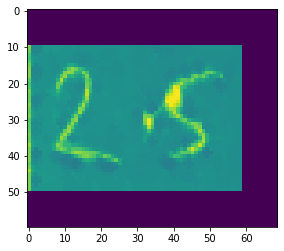

In [187]:
img = cv2.imread('../second/images/img30.jpg',0)
img = 255 - img
# img = cv2.GaussianBlur(img,(3,3),10)
img = cv2.erode(img,kernel,iterations=1)
mask = np.zeros(img.shape[:2], np.uint8)
# display(mask)
h,w = img.shape
print(img.shape)
mask[10:h-10, 0:w-10] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
plt.imshow(masked_img);
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
# plt.plot(hist_full)
# plt.plot(hist_mask)
# plt.show()
t = 100
img[img < t] = 0
img[img > t] = 255
display(img)

### OTSU Thresholding 

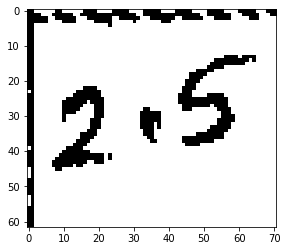

In [17]:
im = cv2.imread('../second/images/img7.jpg',0)
_,th1 = cv2.threshold(im, 127,255, cv2.THRESH_OTSU)
plt.imshow(th1,cmap='gray');

array([[255, 255, 255, ...,   0,   0, 255],
       [255, 255, 255, ...,   0,   0, 255],
       [255, 255, 255, ...,   0,   0, 255],
       ...,
       [255, 255, 255, ...,   0,   0, 255],
       [255, 255, 255, ...,   0,   0, 255],
       [255, 255, 255, ...,   0,   0, 255]], dtype=uint8)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

15
0
Area: 18


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

1
Area: 32


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

2
Area: 16


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

3
Area: 42


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

4
Area: 42


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

5
Area: 400


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

6
Area: 420


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

7
Area: 27


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

8
Area: 18


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

9
Area: 570


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

10
Area: 570


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

11
Area: 570


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

12
Area: 540


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

13
Area: 72


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

14
Area: 16


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

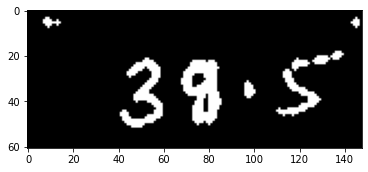

In [4]:
kernel = np.array([[0,1,0],
                   [1,1,1],
                   [0,1,0]],dtype = np.uint8)
p = 65
im = cv2.imread('../second/images/img{0}.jpg'.format(p),0)
_,th1 = cv2.threshold(im, 127,255, cv2.THRESH_OTSU)
display(th1);
img = th1.copy()
img = cv2.dilate(img,kernel)
img = cv2.erode(img,kernel)
h,w = img.shape
img = 255 - img
display(img)
plt.imshow(img, cmap='gray');
mask = np.ones(img.shape[:2], np.uint8)*0
mt = 10
mask[mt:h-mt, mt:w-mt] = 255
display(mask)
img = cv2.bitwise_and(img,img,mask = mask)
# t = np.mean(img) + np.std(img)/2
# t = np.mean(img)
# print("T:",t)

display(img)
# print(img[30])
# img[img < t] = 0
# img[img > t] = 255
# img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# print(img[30])
# img = 255 - img
# print(img[30])
display(img)
con,boundings = thresh_callback(50,img, area_threshold=20)

In [100]:
boundings = sorted(boundings, key=lambda x: x[0])
for b in boundings:
    x,y,w,h = b
    if w*h > 25:
        k = img[y:y+h,x:x+w]
        k = cv2.resize(k,(28,28))
        k = k.reshape((1,k.shape[0],k.shape[1],1))
        display(k[0])
        print(model.predict(k).argmax())

2
2
8
8
2
2
8
5
5
4
4


In [95]:
boundings[0][1]

33

In [77]:
x_test[0].shape

(28, 28, 1)

In [82]:
k.shape

(1, 28, 28, 1)

In [85]:
model.predict(k).argmax()

5

In [41]:
np.array(regions)

ValueError: could not broadcast input array from shape (28,4) into shape (28)

In [44]:
for p in regions:
    print(np.array(p).shape)

(28,)
(28, 4)


In [46]:
len(regions)

2